In [8]:
# Libary Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as hcl

# Local Imports
from utility import load_data

In [9]:
# Load the Data
df = load_data()
df.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,-0.0053,-0.0112,-0.0004,-0.0032,-0.0074,-0.0273,-0.0073,-0.0113,-0.0056,-0.0089,...,-0.0075,-0.0121,-0.0157,0.0008,-0.0096,-0.0053,-0.0057,-0.0108,-0.0060,-0.0026
2005-01-04,-0.0187,-0.0032,-0.0096,-0.0101,0.0056,-0.0076,-0.0137,-0.0038,-0.0113,-0.0137,...,-0.0180,-0.0217,-0.0184,-0.0113,-0.0041,-0.0104,-0.0048,-0.0167,-0.0151,-0.0134
2005-01-05,-0.0108,-0.0035,-0.0107,-0.0069,-0.0017,-0.0140,-0.0045,-0.0050,-0.0004,-0.0106,...,-0.0204,-0.0063,-0.0089,0.0000,-0.0095,-0.0036,0.0017,-0.0241,-0.0054,-0.0055
2005-01-06,-0.0006,0.0022,0.0083,0.0027,-0.0059,0.0044,0.0092,0.0070,0.0073,0.0042,...,0.0048,0.0028,0.0054,-0.0010,0.0102,0.0033,0.0047,0.0073,0.0127,0.0064
2005-01-07,-0.0054,0.0033,-0.0039,0.0027,0.0133,-0.0143,-0.0058,-0.0016,0.0069,-0.0006,...,-0.0079,-0.0050,-0.0066,-0.0003,-0.0022,-0.0065,-0.0040,0.0029,-0.0045,-0.0005


In [10]:
# Correlation Matrix
corr = df.corr(method='pearson') # other: 'pearson' or 'kendall'

In [11]:
# Choosing the Optimal Point Distance

# Distances
distances=["euclidean", "sqeuclidean", "cityblock", "cosine",
           "chebyshev", "braycurtis", "correlation"]

# Calculating the cophenet distance
for distance in distances:
    dist = pdist(corr, metric=distance)
    print(distance, hcl.cophenet(hcl.ward(dist), dist)[0])

euclidean 0.46296441268567934
sqeuclidean 0.8196142556508589
cityblock 0.7450894696525386
cosine 0.8891247762252988
chebyshev 0.6694530281560072
braycurtis 0.8064468176862092
correlation 0.7653753644821549


In [12]:
# Setting the optimal Point Distance, and choosing ward as linkage
dist = pdist(corr, metric="cosine") # Point Distance
Z = hcl.linkage(dist,'ward') # Cluster Distance: single, complete, average, ward

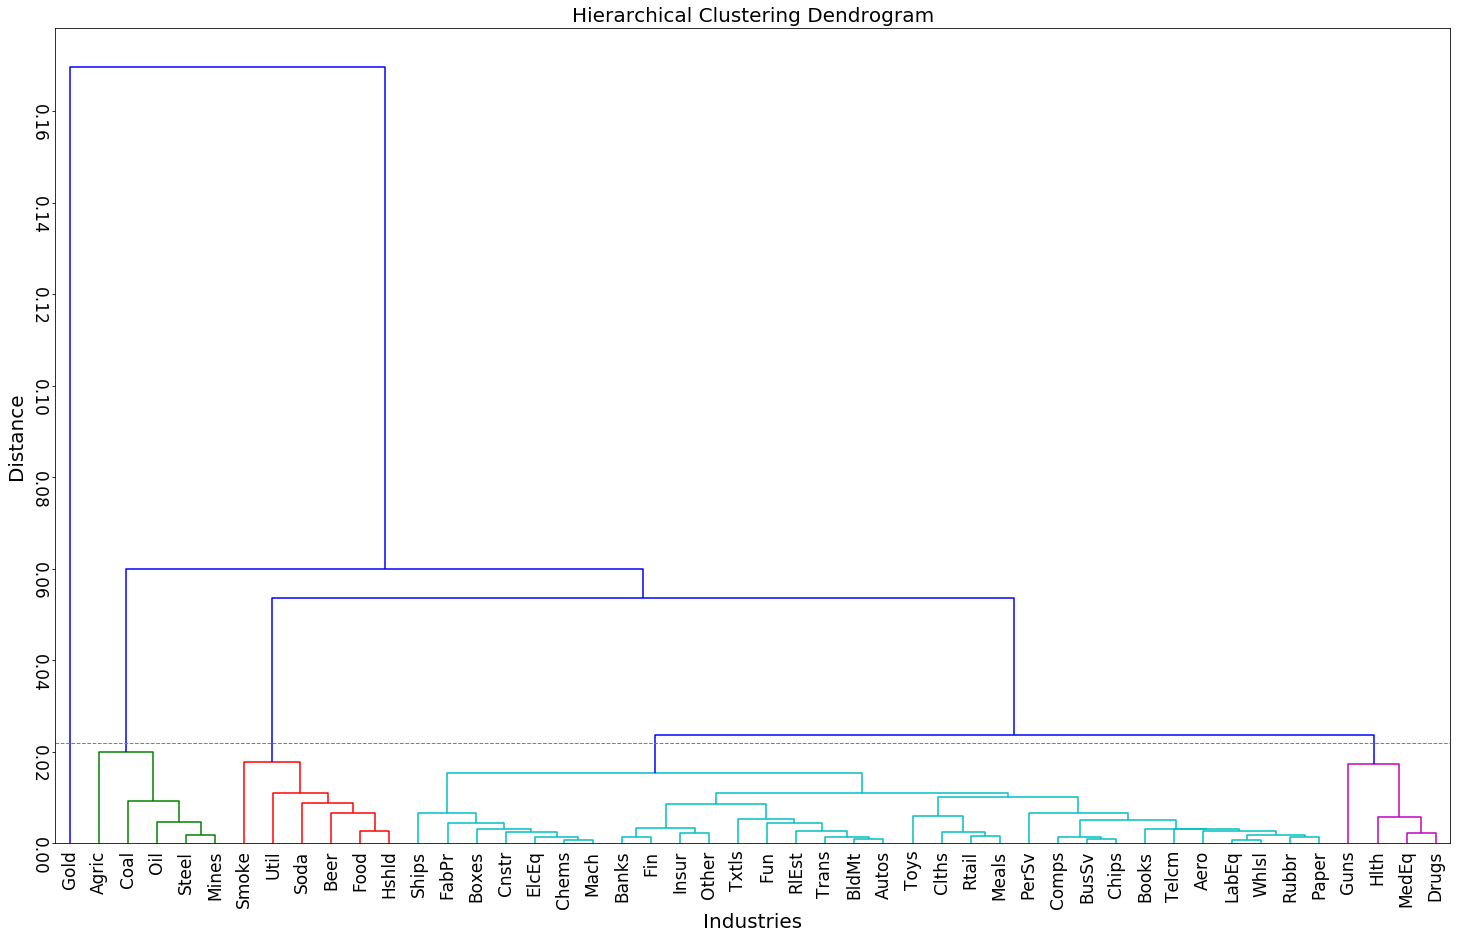

In [14]:
# Visualizing the Clusters

fig, ax = plt.subplots(figsize=(25,15))
ax.set_title('Hierarchical Clustering Dendrogram', fontsize=20)
ax.set_xlabel('Industries', fontsize=20)
ax.set_ylabel('Distance', fontsize=20)
ax.tick_params(axis="y", labelsize=17,rotation=-90)

hcl.dendrogram(Z,
    leaf_font_size=17,
    leaf_rotation=90., 
    labels = corr.index,
    color_threshold = 0.022,
    ax=ax);

ax.axhline(y=0.022, c='grey', lw=1, linestyle='dashed')
plt.show()

In [15]:
# Retrieve the clusters

prompt = float(input("Set the cluster cutoff by inconsistency (1) or max_d (2) or maxclust (3)"))

if prompt == 1:
    # Set the cluster cuf-off by inconsistency
    cluster = hcl.fcluster(Z, 1.0098,criterion='inconsistent') #kendall 1.15454

elif prompt == 2:
    max_d = input("Please set the max_d: ") #0.022
    cluster = hcl.fcluster(Z, max_d, criterion='distance')

elif prompt == 3:
    k = input("Please set the maxlust: ")
    cluster = hcl.fcluster(Z, k, criterion='maxclust')

details = [(name,idx) for name, idx in zip(corr.index,cluster)]
details.sort(key = lambda details: details[1])
print(details)

[('Agric', 1), ('Steel', 1), ('Mines', 1), ('Coal', 1), ('Oil', 1), ('Food', 2), ('Soda', 2), ('Beer', 2), ('Smoke', 2), ('Hshld', 2), ('Util', 2), ('Chems', 3), ('Cnstr', 3), ('FabPr', 3), ('Mach', 3), ('ElcEq', 3), ('Ships', 3), ('Boxes', 3), ('Banks', 4), ('Insur', 4), ('Fin', 4), ('Other', 4), ('Fun', 5), ('Txtls', 5), ('BldMt', 5), ('Autos', 5), ('Trans', 5), ('RlEst', 5), ('Toys', 6), ('Clths', 6), ('Rtail', 6), ('Meals', 6), ('BusSv', 7), ('Comps', 7), ('Chips', 7), ('Books', 8), ('Rubbr', 8), ('Aero', 8), ('Telcm', 8), ('LabEq', 8), ('Paper', 8), ('Whlsl', 8), ('PerSv', 9), ('Hlth', 10), ('MedEq', 10), ('Drugs', 10), ('Guns', 10), ('Gold', 11)]
